In [1]:
import cv2
import os
import glob
import numpy as np

n=150
# Input folders
image_folder = r"C:\Users\saira\OneDrive\Desktop\ml\Images"
keypoints_folder = r"C:\Users\saira\OneDrive\Desktop\ml\Keypoints"

# Get list of image paths and keypoints paths
image_paths = glob.glob(os.path.join(image_folder, "*.jpg"))
keypoints_paths = [os.path.join(keypoints_folder, os.path.basename(img_path).replace(".jpg", ".txt")) for img_path in image_paths]

def resize_image(image, size=(640, 640)):
    resized_image = cv2.resize(image, size)
    return resized_image

def reshape_image(image, new_size=(n, n)):
    reshaped_image = cv2.resize(image, new_size)
    return reshaped_image


def change_keypoint_coordinates(keypoints, original_size, new_size):
    # Assuming keypoints are in the format [(x1, y1), (x2, y2), ...]
    # Calculate scaling factors for x and y coordinates
    scale_x = new_size[0] / original_size[0]
    scale_y = new_size[1] / original_size[1]

    # Rescale keypoints
    new_keypoints = []
    for keypoint in keypoints:
        new_x = int(keypoint[0] * scale_x)
        new_y = int(keypoint[1] * scale_y)
        new_keypoints.append((new_x, new_y))

    return new_keypoints

x_train = []
y_train = []
print(x_train)
# Process each image and keypoints pair
for img_path, keypoint_path in zip(image_paths, keypoints_paths):
    # Load image
    image = cv2.imread(img_path)

    # Check if image loading is successful
    if image is None:
        print(f"Error: Unable to read image '{img_path}'")
        continue

    # Resize image to 640x640
    resized_image = resize_image(image)

    # Reshape image to 62x62  # Update this line
    reshaped_image = reshape_image(resized_image, new_size=(n, n))

    # Load keypoints (assuming they are stored as (x, y) coordinates in a text file)
    try:
        with open(keypoint_path, "r") as f:
            keypoints = [tuple(map(float, line.strip().split(','))) for line in f]
    except FileNotFoundError:
        print(f"Error: Keypoints file '{keypoint_path}' not found")
        continue
    except Exception as e:
        print(f"Error: {e}")
        continue

    # Change keypoint coordinates
    original_image_size = image.shape[:2]  # Assuming the original image size is needed
    new_image_size = reshaped_image.shape[:2]
    new_keypoints = change_keypoint_coordinates(keypoints, original_image_size, new_image_size)

    # Append reshaped image and keypoints to x_train and y_train
    x_train.append(reshaped_image)
    y_train.append(new_keypoints)

# Pad y_train to ensure all elements have the same length
max_keypoints = max(len(kp) for kp in y_train)
y_train_padded = [kp + [(0, 0)] * (max_keypoints - len(kp)) for kp in y_train]

# Convert lists to numpy arrays
x_train1 = np.array(x_train)
y_train = np.array(y_train_padded)

# Print shapes to verify
print("x_train shape:", x_train1.shape)
print("y_train shape:", y_train.shape)


[]
x_train shape: (560, 150, 150, 3)
y_train shape: (560, 99, 2)


In [2]:
# Define or import necessary functions
def add_gaussian_noise(image, mean=0, std_dev=1):
    noise = np.random.normal(mean, std_dev, image.shape).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

def adjust_brightness(image, alpha=1.0, beta=0):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def adjust_contrast(image, alpha=1.0):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha)
    return adjusted_image

def random_color_augmentation(image):
    alpha = np.random.uniform(0.5, 1.5)
    beta = np.random.randint(-50, 50)
    adjusted_image = adjust_brightness(image, alpha=alpha, beta=beta)
    shuffled_channels = np.random.permutation([0, 1, 2])
    color_augmented_image = adjusted_image[:, :, shuffled_channels]
    return color_augmented_image

# Define augment_images function
def augment_images(images):
    augmented_images1a = []
    augmented_images2a = []
    augmented_images3a = []
    augmented_images4a = []
    for image in images:
        # Add Gaussian noise
        noisy_image = add_gaussian_noise(image)
        augmented_images1a.append(noisy_image)
        
        # Adjust brightness
        brightness_adjusted_image = adjust_brightness(image)
        augmented_images2a.append(brightness_adjusted_image)
        
        # Adjust contrast
        contrast_adjusted_image = adjust_contrast(image)
        augmented_images3a.append(contrast_adjusted_image)
        
        # Random color augmentation
        color_augmented_image = random_color_augmentation(image)
        augmented_images4a.append(color_augmented_image)
    
    return  np.concatenate((augmented_images1a,augmented_images2a,augmented_images3a,augmented_images4a))

# Rest of your code...

# Generate augmented images
x_train_augmented1 = augment_images(x_train1)

In [3]:
# Define or import necessary functions
def add_gaussian_noise(image, mean=0, std_dev=5):
    noise = np.random.normal(mean, std_dev, image.shape).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

def adjust_brightness(image, alpha=1.0, beta=1):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def adjust_contrast(image, alpha=0.5):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha)
    return adjusted_image

def random_color_augmentation(image):
    alpha = np.random.uniform(0.0, 1.5)
    beta = np.random.randint(-10, 10)
    adjusted_image = adjust_brightness(image, alpha=alpha, beta=beta)
    shuffled_channels = np.random.permutation([0, 1, 2])
    color_augmented_image = adjusted_image[:, :, shuffled_channels]
    return color_augmented_image

# Define augment_images function
def augment_images(images):
    augmented_images1b = []
    augmented_images2b = []
    augmented_images3b = []
    augmented_images4b = []
    for image in images:
        # Add Gaussian noise
        noisy_image = add_gaussian_noise(image)
        augmented_images1b.append(noisy_image)
        
        # Adjust brightness
        brightness_adjusted_image = adjust_brightness(image)
        augmented_images2b.append(brightness_adjusted_image)
        
        # Adjust contrast
        contrast_adjusted_image = adjust_contrast(image)
        augmented_images3b.append(contrast_adjusted_image)
        
        # Random color augmentation
        color_augmented_image = random_color_augmentation(image)
        augmented_images4b.append(color_augmented_image)
    
    return  np.concatenate((augmented_images1b,augmented_images2b,augmented_images3b,augmented_images4b))

# Rest of your code...

# Generate augmented images
x_train_augmented2 = augment_images(x_train1)

In [4]:
# Define or import necessary functions
def add_gaussian_noise(image, mean=0, std_dev=6):
    noise = np.random.normal(mean, std_dev, image.shape).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

def adjust_brightness(image, alpha=0.7, beta=0.7):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def adjust_contrast(image, alpha=0.2):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha)
    return adjusted_image

def random_color_augmentation(image):
    alpha = np.random.uniform(0.9, 1.0)
    beta = np.random.randint(-10, 10)
    adjusted_image = adjust_brightness(image, alpha=alpha, beta=beta)
    shuffled_channels = np.random.permutation([0, 1, 2])
    color_augmented_image = adjusted_image[:, :, shuffled_channels]
    return color_augmented_image

# Define augment_images function
def augment_images(images):
    augmented_images1c = []
    augmented_images2c = []
    augmented_images3c = []
    augmented_images4c = []
    for image in images:
        # Add Gaussian noise
        noisy_image = add_gaussian_noise(image)
        augmented_images1c.append(noisy_image)
        
        # Adjust brightness
        brightness_adjusted_image = adjust_brightness(image)
        augmented_images2c.append(brightness_adjusted_image)
        
        # Adjust contrast
        contrast_adjusted_image = adjust_contrast(image)
        augmented_images3c.append(contrast_adjusted_image)
        
        # Random color augmentation
        color_augmented_image = random_color_augmentation(image)
        augmented_images4c.append(color_augmented_image)
    
    return  np.concatenate((augmented_images1c,augmented_images2c,augmented_images3c,augmented_images4c))

# Rest of your code...

# Generate augmented images
x_train_augmented3 = augment_images(x_train1)

In [5]:
# Define or import necessary functions
def add_gaussian_noise(image, mean=0, std_dev=4):
    noise = np.random.normal(mean, std_dev, image.shape).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

def adjust_brightness(image, alpha=0.25, beta=0.25):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def adjust_contrast(image, alpha=0.6):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha)
    return adjusted_image

def random_color_augmentation(image):
    alpha = np.random.uniform(0.75, 1.75)
    beta = np.random.randint(-20, 25)
    adjusted_image = adjust_brightness(image, alpha=alpha, beta=beta)
    shuffled_channels = np.random.permutation([0, 1, 2])
    color_augmented_image = adjusted_image[:, :, shuffled_channels]
    return color_augmented_image

# Define augment_images function
def augment_images(images):
    augmented_images1d = []
    augmented_images2d = []
    augmented_images3d = []
    augmented_images4d = []
    for image in images:
        # Add Gaussian noise
        noisy_image = add_gaussian_noise(image)
        augmented_images1d.append(noisy_image)
        
        # Adjust brightness
        brightness_adjusted_image = adjust_brightness(image)
        augmented_images2d.append(brightness_adjusted_image)
        
        # Adjust contrast
        contrast_adjusted_image = adjust_contrast(image)
        augmented_images3d.append(contrast_adjusted_image)
        
        # Random color augmentation
        color_augmented_image = random_color_augmentation(image)
        augmented_images4d.append(color_augmented_image)
    
    return  np.concatenate((augmented_images1d,augmented_images2d,augmented_images3d,augmented_images4d))

# Rest of your code...

# Generate augmented images
x_train_augmented4 = augment_images(x_train1)
len(x_train_augmented1)

2240

In [6]:
y_train= np.concatenate((y_train, y_train, y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train,y_train), axis=0)
y_train_flattened = y_train.reshape(y_train.shape[0], -1)
y_train_flattened .shape

(14000, 198)

In [7]:
import numpy as np

# Assuming x_train1 is a numpy array of shape (height, width, channels)
x_combined_image = np.concatenate((x_train1,x_train_augmented1,  x_train1,x_train_augmented2, x_train_augmented3, x_train1,x_train_augmented4 ,x_train_augmented4, x_train1, x_train1), axis=0)


In [8]:
x_combined_image .shape

(14000, 150, 150, 3)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from functools import partial
input_shape = (n, n, 3)  # height, width, channels



# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01), input_shape=input_shape),
    tf.keras.layers.Conv2D(6, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01),padding='same',kernel_regularizer ="l2"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01),padding='same',kernel_regularizer ="l2"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(30, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01),padding='same',kernel_regularizer ="l2"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(60, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01),padding='same',kernel_regularizer ="l2"),
    layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(80, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01),padding='same',kernel_regularizer ="l2"),
    layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(100, (3, 3), activation=partial(tf.nn.leaky_relu, alpha=0.01),padding='same',kernel_regularizer ="l2"),
    layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
   
   
   
   
    tf.keras.layers.Flatten(),
    layers.Dropout(0.1),
 
    tf.keras.layers.Dense(512,activation='relu',kernel_regularizer ="l2"),
    layers.Dropout(0.2),
   
    tf.keras.layers.Dense(198,activation='relu')
])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 6)       168       
                                                                 
 conv2d_22 (Conv2D)          (None, 148, 148, 6)       330       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 74, 74, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 74, 74, 16)        880       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 37, 37, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 37, 37, 30)       

In [ ]:
model.fit(x_combined_image,y_train_flattened,validation_split=0.2,epochs=5000,batch_size=560)

Epoch 1/5000
20/20 [==============================] - 47s 2s/step - loss: 27.7495 - accuracy: 0.6471 - val_loss: 20.3582 - val_accuracy: 0.7457
Epoch 2/5000
20/20 [==============================] - 47s 2s/step - loss: 27.2938 - accuracy: 0.6512 - val_loss: 22.4154 - val_accuracy: 0.7621
Epoch 3/5000
20/20 [==============================] - 47s 2s/step - loss: 27.5050 - accuracy: 0.6624 - val_loss: 22.1857 - val_accuracy: 0.7568
Epoch 4/5000
20/20 [==============================] - 47s 2s/step - loss: 28.0382 - accuracy: 0.6538 - val_loss: 20.4207 - val_accuracy: 0.7514
Epoch 5/5000
20/20 [==============================] - 47s 2s/step - loss: 28.5506 - accuracy: 0.6571 - val_loss: 31.4018 - val_accuracy: 0.7382
Epoch 6/5000
20/20 [==============================] - 47s 2s/step - loss: 29.0380 - accuracy: 0.6527 - val_loss: 24.9242 - val_accuracy: 0.7418
Epoch 7/5000
20/20 [==============================] - 47s 2s/step - loss: 28.4197 - accuracy: 0.6503 - val_loss: 20.2274 - val_accuracy:

In [ ]:
model.evaluate(x_combined_image,y_train_flattened)

In [171]:
from matplotlib.pyplot import imshow

(70, 70, 3)
1/1 [==============================] - 0s 50ms/step
AxesImage(shape=(70, 70, 3))


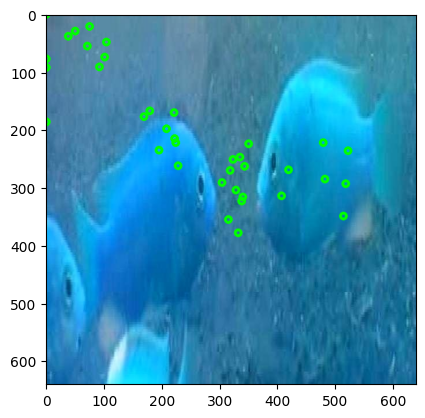

In [173]:
import cv2
import numpy as np

# Load and preprocess the image
image_path = r"C:\Users\saira\OneDrive\Desktop\DePondFi'24-Test-Phase-I\DePondFi'24-Test-Phase-I\Images\frame185_jpg.rf.272a25920692e7e8185e2f423b3c6cfa.jpg"

image = cv2.imread(image_path)
resized_image = resize_image(image)
reshaped_image = reshape_image(resized_image, new_size=(n, n))
print(reshaped_image.shape)

# Make predictions
predictions = model.predict(np.array([reshaped_image]))
predictions = predictions.reshape((-1, 2))

for point in predictions:
    center = (int(point[0]), int(point[1]))
    # Draw a green circle at each keypoint location
    cv2.circle(reshaped_image, center, radius=5, color=(0, 255, 0), thickness=3)
print(imshow(reshaped_image))
# Calculate scaling factors
scale_x = image.shape[1] / n
scale_y = image.shape[0] / n

new_keypoints = []

for keypoint in predictions:
    new_x = int(keypoint[0] * scale_x)
    new_y = int(keypoint[1] * scale_y)
    new_keypoints.append((new_x, new_y))

# Optionally, visualize the keypoints on the original image
for point in new_keypoints:
    center = (int(point[0]), int(point[1]))
    # Draw a green circle at each keypoint location
    cv2.circle(image, center, radius=5, color=(0, 255, 0), thickness=3)
imshow(image)

In [ ]:
tf.keras.optimizer.Adam(lean)